In [24]:
from src.Data import Data
from src.Camera import Camera
from src.VisualOdometry import VisualOdometry
from src.data_association import *
from src.utils import *

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [25]:
data = Data()
camera = Camera()

In [26]:
index = 2
world_map = data.get_world_data()
measurement = data.get_measurements_data_points(index)
trajectory = data.get_trajectory_data()
pose_1 = v2T([0, 0, trajectory[index][0], 0, 0, 0])
camera.set_c_T_w(np.linalg.inv(pose_1))

In [27]:
matches = data_association_on_appearance(measurement, world_map)

image_points = matches['points_1'] # world map
world_points = matches['points_2'] # measurements

projected_points = []
for i in range(len(world_points)):
    world_point_hom = np.append(world_points[i], 1)
    world_point_in_camera = np.linalg.inv(camera.get_camera_transform()) @ world_point_hom
    world_point_in_camera = world_point_in_camera[:3] / world_point_in_camera[3]
    
    is_inside, projected_point = camera.project_point(world_point_in_camera)
    if is_inside: projected_points.append(projected_point)

[[ 1.   0.   0.   0. ]
 [ 0.   1.   0.   0. ]
 [ 0.   0.   1.  -0.4]
 [ 0.   0.   0.   1. ]]
[[1.  0.  0.  0. ]
 [0.  1.  0.  0. ]
 [0.  0.  1.  0.4]
 [0.  0.  0.  1. ]]
[[ 1.   0.   0.   0. ]
 [ 0.   1.   0.   0. ]
 [ 0.   0.   1.  -0.4]
 [ 0.   0.   0.   1. ]]
[[1.  0.  0.  0. ]
 [0.  1.  0.  0. ]
 [0.  0.  1.  0.4]
 [0.  0.  0.  1. ]]
[[ 1.   0.   0.   0. ]
 [ 0.   1.   0.   0. ]
 [ 0.   0.   1.  -0.4]
 [ 0.   0.   0.   1. ]]
[[1.  0.  0.  0. ]
 [0.  1.  0.  0. ]
 [0.  0.  1.  0.4]
 [0.  0.  0.  1. ]]
[[ 1.   0.   0.   0. ]
 [ 0.   1.   0.   0. ]
 [ 0.   0.   1.  -0.4]
 [ 0.   0.   0.   1. ]]
[[1.  0.  0.  0. ]
 [0.  1.  0.  0. ]
 [0.  0.  1.  0.4]
 [0.  0.  0.  1. ]]
[[ 1.   0.   0.   0. ]
 [ 0.   1.   0.   0. ]
 [ 0.   0.   1.  -0.4]
 [ 0.   0.   0.   1. ]]
[[1.  0.  0.  0. ]
 [0.  1.  0.  0. ]
 [0.  0.  1.  0.4]
 [0.  0.  0.  1. ]]
[[ 1.   0.   0.   0. ]
 [ 0.   1.   0.   0. ]
 [ 0.   0.   1.  -0.4]
 [ 0.   0.   0.   1. ]]
[[1.  0.  0.  0. ]
 [0.  1.  0.  0. ]
 [0.  0.  1.  0.4]


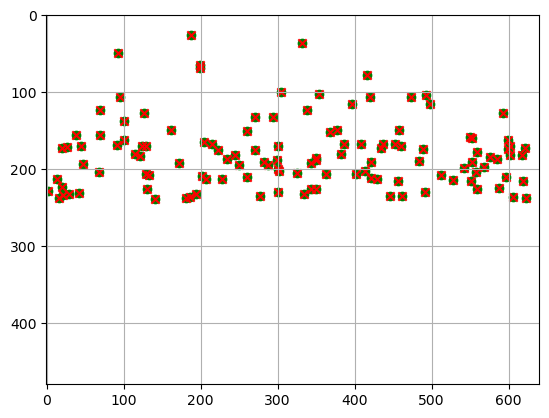

In [28]:
fig, ax = plt.subplots()
ax.imshow(np.ones((480, 640, 3)))
ax.scatter([point[0] for point in projected_points], [point[1] for point in projected_points], color='green', marker='o')
ax.scatter([point[0] for point in image_points], [point[1] for point in image_points], color='red', marker='x')
plt.grid()
plt.show()

[[ 1.   0.   0.   0. ]
 [ 0.   1.   0.   0. ]
 [ 0.   0.   1.  -0.4]
 [ 0.   0.   0.   1. ]]
[[1.  0.  0.  0. ]
 [0.  1.  0.  0. ]
 [0.  0.  1.  0.4]
 [0.  0.  0.  1. ]]
[[ 1.   0.   0.   0. ]
 [ 0.   1.   0.   0. ]
 [ 0.   0.   1.  -0.4]
 [ 0.   0.   0.   1. ]]
[[1.  0.  0.  0. ]
 [0.  1.  0.  0. ]
 [0.  0.  1.  0.4]
 [0.  0.  0.  1. ]]
[[ 1.   0.   0.   0. ]
 [ 0.   1.   0.   0. ]
 [ 0.   0.   1.  -0.4]
 [ 0.   0.   0.   1. ]]
[[1.  0.  0.  0. ]
 [0.  1.  0.  0. ]
 [0.  0.  1.  0.4]
 [0.  0.  0.  1. ]]
[[ 1.   0.   0.   0. ]
 [ 0.   1.   0.   0. ]
 [ 0.   0.   1.  -0.4]
 [ 0.   0.   0.   1. ]]
[[1.  0.  0.  0. ]
 [0.  1.  0.  0. ]
 [0.  0.  1.  0.4]
 [0.  0.  0.  1. ]]
[[ 1.   0.   0.   0. ]
 [ 0.   1.   0.   0. ]
 [ 0.   0.   1.  -0.4]
 [ 0.   0.   0.   1. ]]
[[1.  0.  0.  0. ]
 [0.  1.  0.  0. ]
 [0.  0.  1.  0.4]
 [0.  0.  0.  1. ]]
[[ 1.   0.   0.   0. ]
 [ 0.   1.   0.   0. ]
 [ 0.   0.   1.  -0.4]
 [ 0.   0.   0.   1. ]]
[[1.  0.  0.  0. ]
 [0.  1.  0.  0. ]
 [0.  0.  1.  0.4]


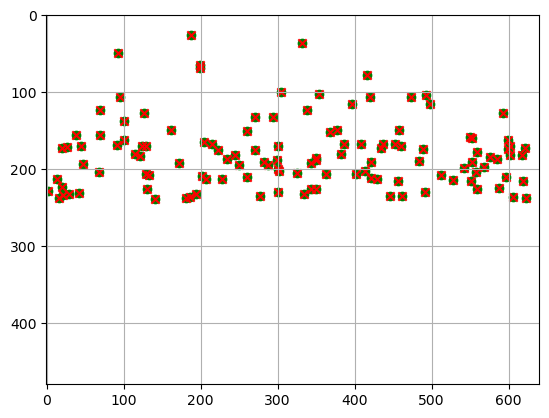

In [29]:
world_points_in_camera = []
for i in range(len(world_points)):
    world_point_hom = np.append(world_points[i], 1)
    world_point_in_camera = np.linalg.inv(camera.get_camera_transform()) @ world_point_hom
    world_point_in_camera = world_point_in_camera[:3] / world_point_in_camera[3]
    world_points_in_camera.append(world_point_in_camera)


projected_points = camera.project_points(world_points_in_camera)
projected_points = {'position':projected_points, 'appearance':world_map['appearance']}
matches = data_association_on_distance(measurement, projected_points)

image_points = matches['points_1'] # world map
projected_points = matches['points_2'] # measurements

fig, ax = plt.subplots()
ax.imshow(np.ones((480, 640, 3)))
ax.scatter([point[0] for point in projected_points], [point[1] for point in projected_points], color='green', marker='o')
ax.scatter([point[0] for point in image_points], [point[1] for point in image_points], color='red', marker='x')
plt.grid()
plt.show()


In [30]:
import pandas as pd
df = pd.DataFrame(matches)  
df

,points_1,points_2
0,"[300.051, 199.734]","[300.0505936224437, 199.73337753558624]"
1,"[558.968, 178.482]","[558.9676767952408, 178.48254219481248]"
2,"[492.844, 103.408]","[492.84428246013664, 103.40774487471526]"
3,"[44.5461, 169.677]","[44.54632497629274, 169.67691569407674]"
4,"[304.115, 99.833]","[304.115220559999, 99.83309865843029]"
...,...,...
118,"[260.672, 209.918]","[260.6724704542493, 209.91776895198845]"
119,"[604.982, 235.883]","[604.9818816103891, 235.88301791673805]"
120,"[299.616, 188.028]","[299.6161395317674, 188.0285284067467]"
121,"[343.475, 192.084]","[343.47472924187724, 192.0839018639947]"


In [31]:
vo = VisualOdometry()

vo.initialize()

In [32]:
import plotly.graph_objects as go   

pose_0 = vo.get_trajectory()[0]
pose_1 = vo.get_trajectory()[1]

world_points = vo.get_map()['position']
print('Number of world points: ', len(world_points))

x_coords = [point[0] for point in world_points]
y_coords = [point[1] for point in world_points]
z_coords = [point[2] for point in world_points]

fig = go.Figure()
fig.add_trace(go.Scatter3d(x=x_coords, y=y_coords, z=z_coords, mode='markers', marker=dict(size=2)))

fig.add_trace(go.Scatter3d(x=[pose_0[0, 3]], y=[pose_0[1, 3]], z=[pose_0[2, 3]], mode='markers', marker=dict(size=4, color='red')))
fig.add_trace(go.Scatter3d(x=[pose_1[0, 3]], y=[pose_1[1, 3]], z=[pose_1[2, 3]], mode='markers', marker=dict(size=4, color='blue')))
fig.add_trace(go.Scatter3d(x=[pose_0[0, 3], pose_1[0, 3]], y=[pose_0[1, 3], pose_1[1, 3]], z=[pose_0[2, 3], pose_1[2, 3],], mode='lines', line=dict(color='black', width=2)))

fig.show()

Number of world points:  115


In [33]:
trajectory = data.get_trajectory_data()
first_triangulation = {'position':[], 'appearance':[]}
triangulated_points = {'position':[], 'appearance':[]}

poses = []

pose_0 = v2T(np.array([0, 0, trajectory[0][0], 0,0,0]))
print(f'Pose 0:\n{np.round(pose_0, 2)}')
measurement_0 = data.get_measurements_data_points(0)
vo.set_current_pose(pose_0)
poses.append(pose_0)

for i in range(1,10):
    pose_i = v2T(np.array([0, 0, trajectory[i][0], 0,0,0]))
    print(f'Pose {i}:\n{np.round(pose_i, 2)}')
    measurement_i = data.get_measurements_data_points(i)
    matches = data_association_on_appearance(measurement_0, measurement_i)
    points_0 = np.array(matches['points_1'])
    points_1 = np.array(matches['points_2'])

    points_3D = vo.triangulate_points(points_0, points_1, pose_0, pose_i)
    map = {'position':points_3D, 'appearance':matches['appearance']}
    for i in range(len(map['position'])):
        if map['appearance'][i] not in triangulated_points['appearance']:
            triangulated_points['position'].append(map['position'][i])
            triangulated_points['appearance'].append(map['appearance'][i])

    vo.set_current_pose(pose_i)
    poses.append(pose_i)

    pose_0 = pose_i
    measurement_0 = measurement_i

Pose 0:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
Pose 1:
[[1.  0.  0.  0. ]
 [0.  1.  0.  0. ]
 [0.  0.  1.  0.2]
 [0.  0.  0.  1. ]]
Pose 2:
[[1.  0.  0.  0. ]
 [0.  1.  0.  0. ]
 [0.  0.  1.  0.4]
 [0.  0.  0.  1. ]]
Pose 3:
[[1.  0.  0.  0. ]
 [0.  1.  0.  0. ]
 [0.  0.  1.  0.6]
 [0.  0.  0.  1. ]]
Pose 4:
[[1.  0.  0.  0. ]
 [0.  1.  0.  0. ]
 [0.  0.  1.  0.8]
 [0.  0.  0.  1. ]]
Pose 5:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 1.]
 [0. 0. 0. 1.]]
Pose 6:
[[1.  0.  0.  0. ]
 [0.  1.  0.  0. ]
 [0.  0.  1.  1.2]
 [0.  0.  0.  1. ]]
Pose 7:
[[1.  0.  0.  0. ]
 [0.  1.  0.  0. ]
 [0.  0.  1.  1.4]
 [0.  0.  0.  1. ]]
Pose 8:
[[1.  0.  0.  0. ]
 [0.  1.  0.  0. ]
 [0.  0.  1.  1.6]
 [0.  0.  0.  1. ]]
Pose 9:
[[1.  0.  0.  0. ]
 [0.  1.  0.  0. ]
 [0.  0.  1.  1.8]
 [0.  0.  0.  1. ]]


In [34]:
print('Number of triangulated points: ', len(triangulated_points['position']))

Number of triangulated points:  171


In [38]:
x_coords = [point[0] for point in triangulated_points['position']]  
y_coords = [point[1] for point in triangulated_points['position']]
z_coords = [point[2] for point in triangulated_points['position']]


fig = go.Figure()
fig.add_trace(go.Scatter3d(x=x_coords, y=y_coords, z=z_coords, mode='markers', marker=dict(size=3)))

x_coors_1 = [point[0] for point in first_triangulation['position']]
y_coors_1 = [point[1] for point in first_triangulation['position']]
z_coors_1 = [point[2] for point in first_triangulation['position']]

fig.add_trace(go.Scatter3d(x=x_coors_1, y=y_coors_1, z=z_coors_1, mode='markers', marker=dict(size=1, color='yellow')))

for pose in poses:
    fig.add_trace(go.Scatter3d(x=[pose[0, 3]], y=[pose[1, 3]], z=[pose[2, 3]], mode='markers', marker=dict(size=2, color='green')))

fig.show()

In [37]:
gt_world_data = data.get_world_data()

matches = data_association_on_appearance(triangulated_points, gt_world_data)
gt_world_points = matches['points_2']

for i in range(len(matches['points_1'])):
    point_1 = matches['points_1'][i]
    point_1 = camera.get_camera_transform() @ np.append(point_1, 1)
    point_1 = point_1[:3] / point_1[3]
    point_2 = matches['points_2'][i]

    distance = np.linalg.norm(point_1 - point_2)
    print(f'Distance between point {i}: {np.round(distance, 2)}')


triangulated_points_hom = [np.append(point, 1) for point in triangulated_points['position']]
triangulated_points_world = camera.get_camera_transform() @ np.array(triangulated_points_hom).T


x_coords = [point[0] for point in triangulated_points_world.T]  
y_coords = [point[1] for point in triangulated_points_world.T]
z_coords = [point[2] for point in triangulated_points_world.T]

fig = go.Figure()
fig.add_trace(go.Scatter3d(x=x_coords, y=y_coords, z=z_coords, mode='markers', marker=dict(size=4)))

x_coords_gt = [point[0] for point in gt_world_points]
y_coords_gt = [point[1] for point in gt_world_points]
z_coords_gt = [point[2] for point in gt_world_points]

fig.add_trace(go.Scatter3d(x=x_coords_gt, y=y_coords_gt, z=z_coords_gt, mode='markers', marker=dict(size=2, color='red')))

fig.show()

Distance between point 0: 0.0
Distance between point 1: 0.0
Distance between point 2: 0.0
Distance between point 3: 0.0
Distance between point 4: 0.0
Distance between point 5: 0.0
Distance between point 6: 0.0
Distance between point 7: 0.0
Distance between point 8: 0.0
Distance between point 9: 0.0
Distance between point 10: 0.0
Distance between point 11: 0.0
Distance between point 12: 0.0
Distance between point 13: 0.0
Distance between point 14: 0.0
Distance between point 15: 0.0
Distance between point 16: 0.0
Distance between point 17: 0.0
Distance between point 18: 0.0
Distance between point 19: 0.0
Distance between point 20: 0.0
Distance between point 21: 0.0
Distance between point 22: 0.0
Distance between point 23: 0.0
Distance between point 24: 0.0
Distance between point 25: 0.0
Distance between point 26: 0.0
Distance between point 27: 0.0
Distance between point 28: 0.0
Distance between point 29: 0.0
Distance between point 30: 0.0
Distance between point 31: 0.0
Distance between p